In [1]:
# !export SPARK_HOME="$HOME/spark-2.4.5-bin-hadoop2.7"

In [2]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession \
    .builder \
    .appName("Our first Spark SQL example") \
    .getOrCreate()

In [4]:
spark.sparkContext.getConf().getAll()

[('spark.app.name', 'Our first Spark SQL example'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '10.234.15.26'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '45279'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.id', 'local-1587685541534')]

In [5]:
spark

In [6]:
path = "data/sparkify_log_small.json"

In [7]:
user_log = spark.read.json(path)

In [8]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [11]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [12]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [13]:
user_log.describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [14]:
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [15]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [16]:
user_log.first()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')

In [17]:
user_log.select("artist").show()

+--------------------+
|              artist|
+--------------------+
|       Showaddywaddy|
|          Lily Allen|
|Cobra Starship Fe...|
|          Alex Smoke|
|                null|
|                null|
|              Redman|
|     Ulrich Schnauss|
|                null|
|                null|
|               Jay-Z|
|         Evanescence|
|     Scissor Sisters|
|        3 Doors Down|
|       George Younce|
|              Aly-Us|
|                null|
|            BjÃÂ¶rk|
|      David Bromberg|
|          Nickelback|
+--------------------+
only showing top 20 rows



In [18]:
user_log.select(user_log["artist"], user_log["auth"]).show()

+--------------------+---------+
|              artist|     auth|
+--------------------+---------+
|       Showaddywaddy|Logged In|
|          Lily Allen|Logged In|
|Cobra Starship Fe...|Logged In|
|          Alex Smoke|Logged In|
|                null|Logged In|
|                null|Logged In|
|              Redman|Logged In|
|     Ulrich Schnauss|Logged In|
|                null|Logged In|
|                null|Logged In|
|               Jay-Z|Logged In|
|         Evanescence|Logged In|
|     Scissor Sisters|Logged In|
|        3 Doors Down|Logged In|
|       George Younce|Logged In|
|              Aly-Us|Logged In|
|                null|Logged In|
|            BjÃÂ¶rk|Logged In|
|      David Bromberg|Logged In|
|          Nickelback|Logged In|
+--------------------+---------+
only showing top 20 rows



In [19]:
user_log.count()

10000

In [20]:
user_log.filter(user_log["length"] > 1000).count()

9

In [21]:
out_path = "data/sparkify_log_small_csv"

In [26]:
# # already exists
# user_log.write.save(out_path, format = "csv", header = True)

In [23]:
user_log_2 = spark.read.csv(out_path, header = True)

In [24]:
user_log_2.count()

10000

In [25]:
user_log_2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [27]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [29]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [30]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [31]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [32]:
user_log.describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [33]:
user_log.filter("length is null").count()

1653

In [34]:
user_log.filter("length is not null").describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [35]:
user_log.filter("length is null").describe().show()

+-------+------+----------+---------+------+------------------+--------+------+-----+----------------+------+-------+--------------------+------------------+----+------------------+--------------------+--------------------+------------------+
|summary|artist|      auth|firstName|gender|     itemInSession|lastName|length|level|        location|method|   page|        registration|         sessionId|song|            status|                  ts|           userAgent|            userId|
+-------+------+----------+---------+------+------------------+--------+------+-----+----------------+------+-------+--------------------+------------------+----+------------------+--------------------+--------------------+------------------+
|  count|     0|      1653|     1317|  1317|              1653|    1317|     0| 1653|            1317|  1653|   1653|                1317|              1653|   0|              1653|                1653|                1317|              1653|
|   mean|  null|      null| 

In [36]:
user_log.count()

10000

In [37]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [38]:
user_log.filter(user_log["page"] == "Submit Downgrade").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+



In [39]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [40]:
user_log.select(["userId", "firstname", "page", "song", "ts"]).where(user_log.userId == "1046").show(n = 30)

+------+---------+--------+--------------------+-------------+
|userId|firstname|    page|                song|           ts|
+------+---------+--------+--------------------+-------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|1513720872284|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|1513721104284|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|1513721310284|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|1513721591284|
|  1046|  Kenneth|NextSong|      Father And Son|1513721808284|
|  1046|  Kenneth|NextSong|               No. 5|1513721976284|
|  1046|  Kenneth|NextSong|           Seventeen|1513722161284|
|  1046|  Kenneth|    Home|                null|1513837636284|
|  1046|  Kenneth|NextSong|          War on war|1513837660284|
|  1046|  Kenneth|NextSong|   Killermont Street|1513837887284|
|  1046|  Kenneth|NextSong|        Black & Blue|1513838080284|
|  1046|  Kenneth|  Logout|                null|1513838081284|
|  1046|  Kenneth|    Home|                null|1513838

In [41]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)  # udf = user-defined function

In [42]:
user_log_mut = user_log.withColumn('hour', get_hour(user_log.ts))

In [43]:
user_log_mut.select(["userId", "firstname", "page", "song", "hour"]).where(user_log_mut.userId == "1046").show(n = 30)

+------+---------+--------+--------------------+----+
|userId|firstname|    page|                song|hour|
+------+---------+--------+--------------------+----+
|  1046|  Kenneth|NextSong|Christmas Tears W...|  17|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|  17|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|  17|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|  17|
|  1046|  Kenneth|NextSong|      Father And Son|  17|
|  1046|  Kenneth|NextSong|               No. 5|  17|
|  1046|  Kenneth|NextSong|           Seventeen|  17|
|  1046|  Kenneth|    Home|                null|   1|
|  1046|  Kenneth|NextSong|          War on war|   1|
|  1046|  Kenneth|NextSong|   Killermont Street|   1|
|  1046|  Kenneth|NextSong|        Black & Blue|   1|
|  1046|  Kenneth|  Logout|                null|   1|
|  1046|  Kenneth|    Home|                null|   1|
|  1046|  Kenneth|NextSong|     Heads Will Roll|   1|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|   1|
|  1046|  Kenneth|NextSong| 

In [44]:
songs_in_hour = user_log_mut.filter(user_log_mut.page == "NextSong").groupby(user_log_mut.hour).count().orderBy(user_log_mut.hour.cast("float"))

In [45]:
songs_in_hour.show(n = 24)

+----+-----+
|hour|count|
+----+-----+
|   0|  276|
|   1|  348|
|   2|  358|
|   3|  375|
|   4|  249|
|   5|  216|
|   6|  228|
|   7|  251|
|   8|  339|
|   9|  462|
|  10|  479|
|  11|  484|
|  12|  430|
|  13|  362|
|  14|  295|
|  15|  257|
|  16|  248|
|  17|  369|
|  18|  375|
|  19|  456|
|  20|  454|
|  21|  382|
|  22|  302|
|  23|  352|
+----+-----+



In [46]:
songs_in_hour_pd = songs_in_hour.toPandas()

In [47]:
songs_in_hour_pd

,hour,count
0,0,276
1,1,348
2,2,358
3,3,375
4,4,249
5,5,216
6,6,228
7,7,251
8,8,339
9,9,462


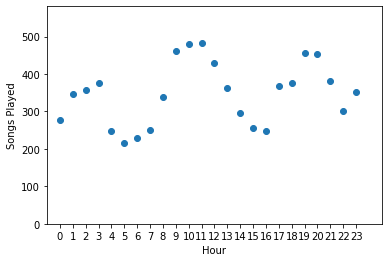

In [48]:
plt.scatter(songs_in_hour_pd['hour'], songs_in_hour_pd['count'])
# songs_in_hour_pd.plot(kind='line', x='hour', y='count')
plt.xlim(-1, 25)
plt.ylim(0, 1.2 * max(songs_in_hour_pd['count']))
plt.xlabel("Hour")
plt.ylabel("Songs Played")
plt.show()

In [49]:
user_log_valid = user_log_mut.dropna(how = "any", subset = ["userId", "sessionId"])

In [50]:
user_log_valid.count()

10000

In [51]:
user_log_mut.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [52]:
user_log_valid_2 = user_log_mut.filter(user_log_valid["userId"] != "")

In [53]:
user_log_valid_2.count()

9664

In [54]:
user_log_valid_2.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|   6|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [55]:
user_log_mut.select(["userId", "firstname", "page", "level", "song"]).where(user_log_mut.userId == "1138").show(n=100)  # .collect()

+------+---------+----------------+-----+--------------------+
|userId|firstname|            page|level|                song|
+------+---------+----------------+-----+--------------------+
|  1138|    Kelly|            Home| paid|                null|
|  1138|    Kelly|        NextSong| paid| Everybody Everybody|
|  1138|    Kelly|        NextSong| paid|               Gears|
|  1138|    Kelly|        NextSong| paid|        Use Somebody|
|  1138|    Kelly|        NextSong| paid|Love Of My Life (...|
|  1138|    Kelly|        NextSong| paid|Down In The Valle...|
|  1138|    Kelly|        NextSong| paid|Treat Her Like A ...|
|  1138|    Kelly|        NextSong| paid|Everybody Thinks ...|
|  1138|    Kelly|        NextSong| paid|      Fourteen Wives|
|  1138|    Kelly|        NextSong| paid|   Love On The Rocks|
|  1138|    Kelly|        NextSong| paid|           Breakeven|
|  1138|    Kelly|        NextSong| paid|          Leaf House|
|  1138|    Kelly|        NextSong| paid|       NAISEN 

In [56]:
flag_downgrade_event = udf(lambda x: 1 if x == 'Submit Downgrade' else 0, IntegerType())

In [57]:
user_log_valid_2_mut = user_log_valid_2.withColumn('downgraded', flag_downgrade_event("page"))

In [58]:
user_log_valid_2_mut.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='17', downgraded=0)

In [59]:
from pyspark.sql import Window

In [60]:
windoweval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [61]:
user_log_valid_2_mut_2 = user_log_valid_2_mut.withColumn("phase", Fsum("downgraded").over(windoweval))

In [62]:
user_log_valid_2_mut_2.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log_valid_2_mut_2.userId == "1138").sort("ts").collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs